In [1]:
import sys
import find_best_focus
from pathlib import Path

In [2]:
import numpy as np

In [3]:
import sys
sys.path.append("../src/")
from image_utils import assemble_filename, assemble_fullpath

In [4]:
input_dir = Path("/global/homes/b/brookluo/wiro-data/raw/20221127")
output_dir = Path("/global/homes/b/brookluo/test_focus/1127")

In [5]:
if not output_dir.exists():
    output_dir.mkdir()

In [6]:
# import importlib
# importlib.reload(find_best_focus)
from find_best_focus import find_best_focus

In [7]:
center_y = 2444 # x image
center_x = 2422 # y image
center_xs = [center_x]*6
center_ys = [center_y]*6
box_size = 20
# center_ys += [1747]*8
# center_xs += [2315]*8

In [23]:
filt = "D"
foci =  -1 * np.array([2.3, 2.4, 2.5, 2.6, 2.8, 2.55, 2.58, 2.65])

['a059.fit', 'a060.fit', 'a061.fit', 'a062.fit', 'a063.fit', 'a064.fit', 'a065.fit', 'a066.fit']
a059.fit, focus: -2.3, INST: -2.293, CMD: -2.300, fwhm: 9.038254472466244
a060.fit, focus: -2.4, INST: -2.401, CMD: -2.400, fwhm: 7.026229684382465
a061.fit, focus: -2.5, INST: -2.502, CMD: -2.500, fwhm: 7.218126360410086
a062.fit, focus: -2.6, INST: -2.602, CMD: -2.600, fwhm: 7.86835054091471
a063.fit, focus: -2.8, INST: -2.799, CMD: -2.800, fwhm: 8.950539152928782
a064.fit, focus: -2.55, INST: -2.552, CMD: -2.550, fwhm: 7.460626466636817
a065.fit, focus: -2.58, INST: -2.582, CMD: -2.580, fwhm: 6.94652295318208
a066.fit, focus: -2.65, INST: -2.651, CMD: -2.650, fwhm: 7.248534397029098
Best focus: -2.55
Best focus: -2.55


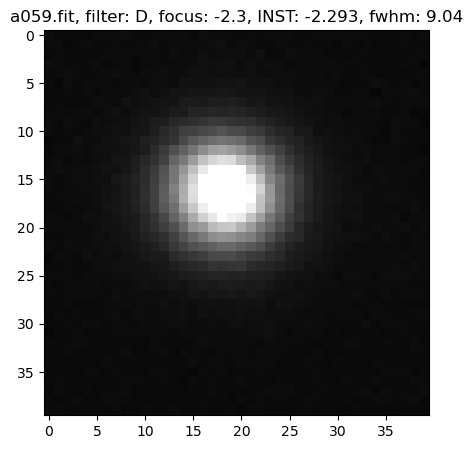

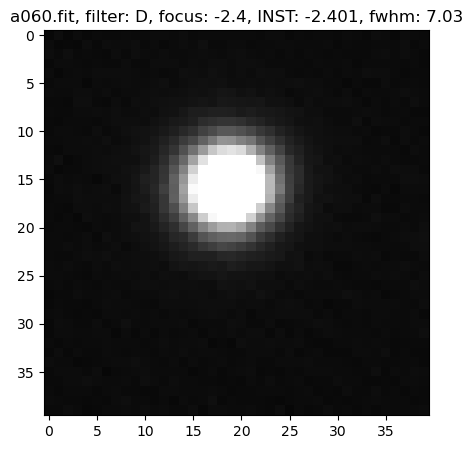

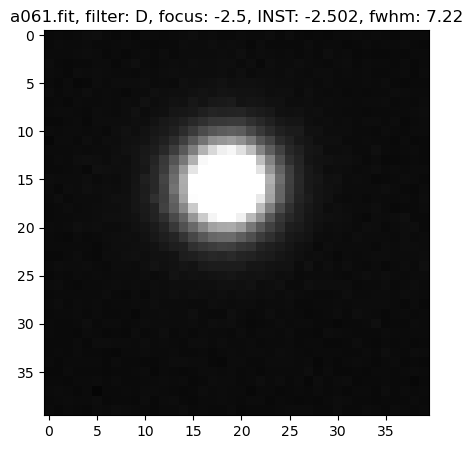

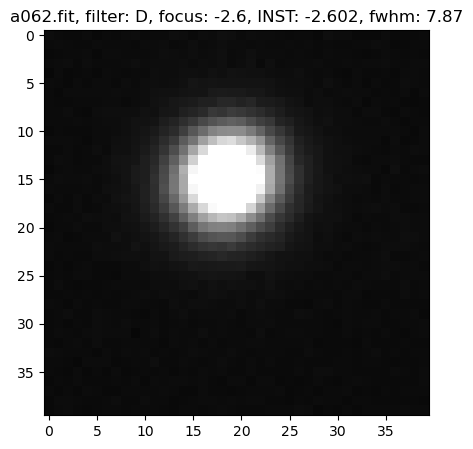

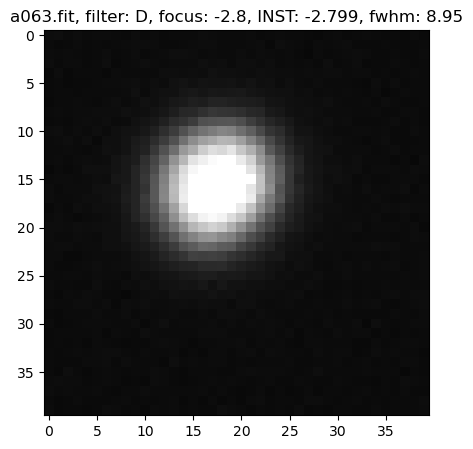

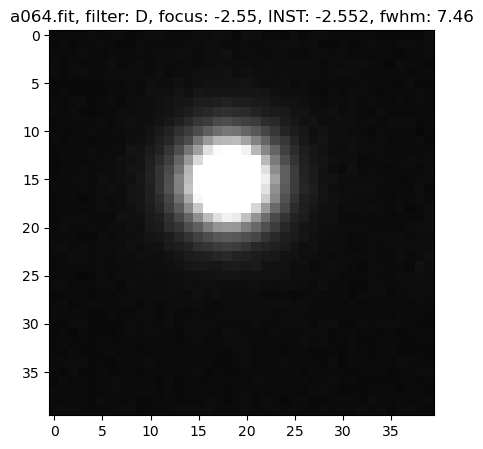

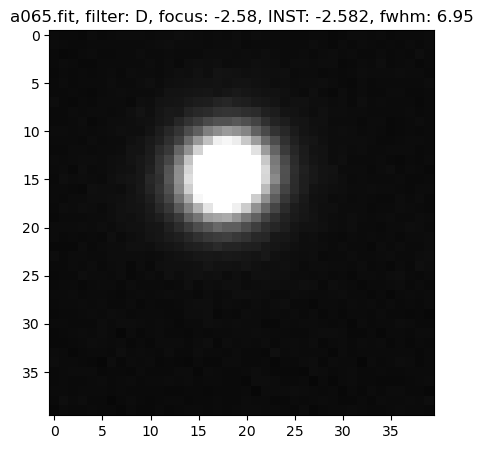

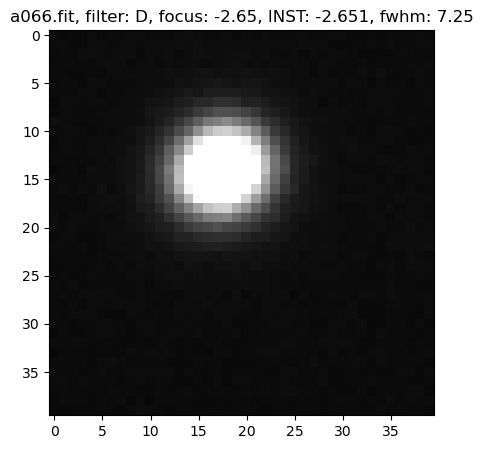

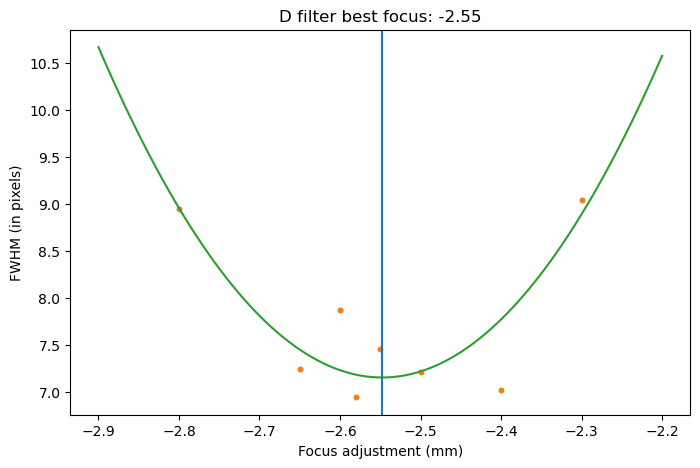

In [24]:
find_best_focus(assemble_filename("a{:03d}.fit", "59-66"),
                # + assemble_filename("a{:03d}.fit", "59-61"), 
                foci, 
                center_x, center_y, box_size, filt, input_dir, output_dir)

In [85]:
from scipy.interpolate import griddata, interp2d

In [ ]:
foci_dict = {}
foci_dict["g"] = []

In [154]:
temp = [45, 41, 43, 41, 21, 36, 30, 32, 29]
humi = [65, 65, 27, 48, 79, 36, 50, 44, 54]
# -2.04	-2.76		-2.84	-2.6	-2.68
g_foci = [-2.54,
    -2.35,
    -1.61,
    -1.71,
    -2.53,
    -1.95,
    -2.15,
    -1.86,
    -2.04
    
]
A_foci = [
    -3.14,
    -3.14,
    -2.37,
    -2.43,
    -3.2,
    -2.63,
    -2.86,
    -2.55,
    -2.76
]
C_foci = [
    -3.27,
    -3.22,
    -2.42,
    -2.52,
    -3.34,
    -2.83,
    -2.93,
    -2.56,
    -2.84
]
D_foci = [
    -2.91,
    -2.87,
    -2.1,
    -2.16,
    -2.92,
    -2.43,
    -2.58,
    -2.27,
    -2.6
]
E_foci = [
    -3.01,
    -3.01,
    -2.22,
    -2.25,
    -3.07,
    -2.65,
    -2.76,
    -2.42,
    -2.68
]

In [164]:
f_g = interp2d(temp, humi, g_foci, kind="linear")
f_C = interp2d(temp, humi, C_foci, kind="linear")
f_D = interp2d(temp, humi, D_foci, kind="linear")
f_E = interp2d(temp, humi, E_foci, kind="linear")
f_A = interp2d(temp, humi, A_foci, kind="linear")

In [168]:
cur_temp = 34
cur_humi = 61
print(f"Expected focus:\ng: {f_g(cur_temp, cur_humi)[0] + 0.4:.4f}\nC: {f_C(cur_temp, cur_humi)[0]+0.4:.4f}\nD: {f_D(cur_temp, cur_humi)[0]+0.4:4f}\n"
      +f"E: {f_E(cur_temp, cur_humi)[0]+0.4:.4f}\nA: {f_A(cur_temp, cur_humi)[0]+0.4:.4f}")

Expected focus:
g: -1.8676
C: -2.7487
D: -2.363939
E: -2.5527
A: -2.6695


In [169]:
import matplotlib.pyplot as plt

In [170]:
arr_temp = np.linspace(20, 50, 100)
arr_humi = np.linspace(30, 75)

Text(0, 0.5, 'Humidity %')

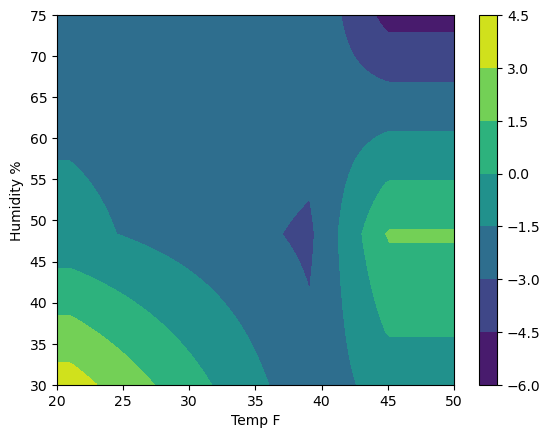

In [171]:
plt.contourf(arr_temp, arr_humi, f_g(arr_temp, arr_humi))
plt.colorbar()
plt.xlabel("Temp F")
plt.ylabel("Humidity %")

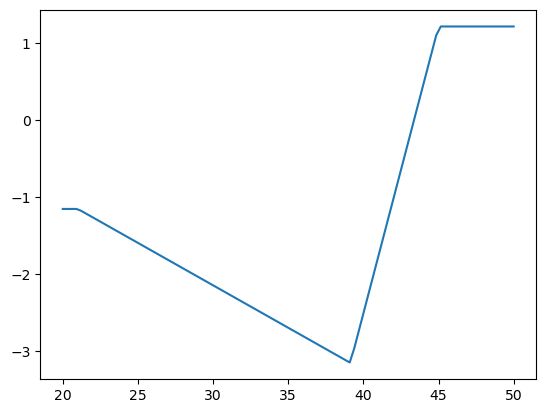

In [172]:
plt.plot(arr_temp, f_g(arr_temp, 50))